In [38]:
# Written by Herman van Haagen, https://www.linkedin.com/in/hermanvanhaagen/

In [39]:
import numpy as np
import matplotlib.pyplot as plt

We will be using the sigmoid activation function and its derivatie

In [40]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

In [41]:
# the derivative of the activation function
def derivative_sigmoid(y):
    return y*(1 - y)

### Creating XOR data

In [42]:
# Create dummy data. 100 instances for each class
f1 = []
f1 = np.append(np.random.normal(-3,1,100),f1)
f1 = np.append(np.random.normal(3,1,100),f1)
f1 = np.append(np.random.normal(-3,1,100),f1)
f1 = np.append(np.random.normal(3,1,100),f1)
f2 = []
#x1 = np.append(np.random.normal(-1,1,100),np.random.normal(1,1,100),np.random.normal(-1,1,100))
f2 = np.append(np.random.normal(-3,1,100),f2)
f2 = np.append(np.random.normal(-3,1,100),f2)
f2 = np.append(np.random.normal(3,1,100),f2)
f2 = np.append(np.random.normal(3,1,100),f2)

# Create labels for the two classes
labels = []

labels = np.append(np.zeros(100),labels)
labels = np.append(np.ones(100),labels)
labels = np.append(np.ones(100),labels)
labels = np.append(np.zeros(100),labels)

# Shuffle de labels en data. This is needed for proper training
sample = list(range(0, 400))
np.random.shuffle(sample)
f1 = f1[sample]
f2 = f2[sample]
labels = labels[sample]

f1 = (f1-min(f1))/(max(f1)-min(f1))
f2 = (f2-min(f2))/(max(f2)-min(f2))

Check if the XOR data looks OK. 

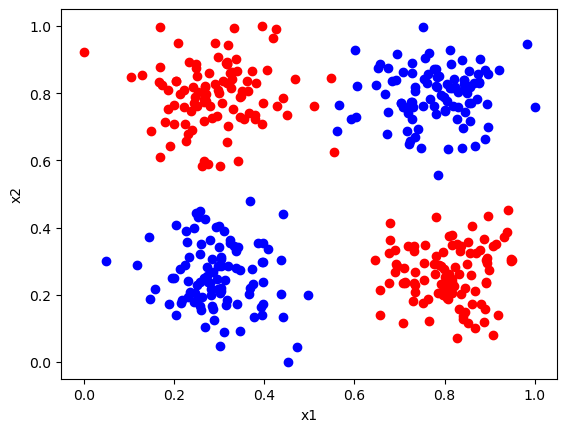

In [43]:
# Plot the XOR data
indpos = np.where(labels==1)
indneg = np.where(labels==0)
plt.scatter(f1[indpos],f2[indpos],color="red")
plt.scatter(f1[indneg],f2[indneg],color="blue")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Initialization of parameters

In [44]:
# We initialize the learning rate and the number of epochs. 
lr = 0.05
epochs = 1000

In [45]:
# We Initialize the weights as biases in the network. We do this between [-0.5, 0.5]

w11 = np.random.rand()-0.5
w12 = np.random.rand()-0.5
w21 = np.random.rand()-0.5
w22 = np.random.rand()-0.5
b1  = np.random.rand()-0.5
b2  = np.random.rand()-0.5
v1 = np.random.rand()-0.5
v2 = np.random.rand()-0.5
b3 = np.random.rand()-0.5

In [46]:
# Keep track of the learning process
monitor_error = []

### Training the XOR neural net with backpropagation

In [47]:
for epoch in range(epochs):
    
    sum_error = 0
    for n in range(400): # size of dataset 
        
        # Select one instance of the data (Stochastic gradient descent)
        x1 = f1[n]
        x2 = f2[n]
        label = labels[n] 
            
        # The forward pass
        y1 = w11*x1 + w12*x2 + b1
        y2 = w21*x1 + w22*x2 + b2
        z1 = sigmoid(y1)        
        z2 = sigmoid(y2)
        y3 = v1*z1 + v2*z2 + b3
        O  = sigmoid(y3)
        
        # -- backward propagation --
        error = (O-label)
        sum_error += error**2
        
        # last layer
        delta_v1 = error*derivative_sigmoid(O)*z1
        delta_v2 = error*derivative_sigmoid(O)*z2
        delta_b3 = error*derivative_sigmoid(O)
    
        # hidden layer perceptron 1
        delta_w11 = error*derivative_sigmoid(O)*v1*derivative_sigmoid(z1)*x1
        delta_w12 = error*derivative_sigmoid(O)*v1*derivative_sigmoid(z1)*x2
        delta_b1  = error*derivative_sigmoid(O)*v1*derivative_sigmoid(z1)
    
        # hidden layer perceptron 2
        delta_w21 = error*derivative_sigmoid(O)*v2*derivative_sigmoid(z2)*x1
        delta_w22 = error*derivative_sigmoid(O)*v2*derivative_sigmoid(z2)*x2
        delta_b2  = error*derivative_sigmoid(O)*v2*derivative_sigmoid(z2)
        
        # all the update rules. Each weight and bias has its own update rule
        v1 = v1 - lr*delta_v1
        v2 = v2 - lr*delta_v2
        b3 = b3 - lr*delta_b3
    
        w11 = w11 - lr*delta_w11
        w12 = w12 - lr*delta_w12
        b1  = b1  - lr*delta_b1
    
        w21 = w21 - lr*delta_w21
        w22 = w22 - lr*delta_w22
        b2  = b2  - lr*delta_b2
        
    monitor_error += [sum_error/400]

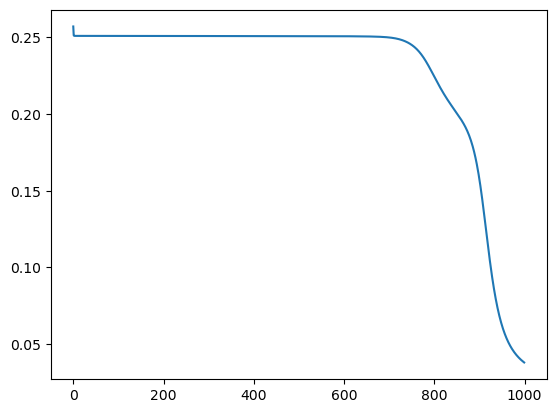

In [48]:
plt.plot(monitor_error)

### Plot the two discriminant lines
The two lines show how the XOR problem can be solved using this neural network

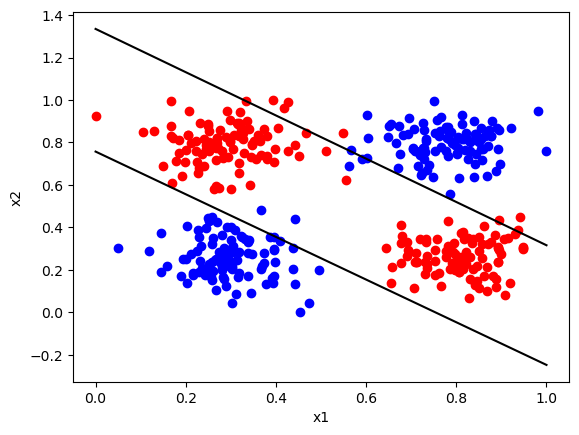

In [51]:
# Plot the XOR data. 
indpos = np.where(labels==1)
indneg = np.where(labels==0)
plt.scatter(f1[indpos],f2[indpos],color="red")
plt.scatter(f1[indneg],f2[indneg],color="blue")
plt.xlabel('x1')
plt.ylabel('x2')

# Draw the decision boundaries
rc = -w11/w12
bias = -b1/w12
x = np.linspace(0,1,num=100)
y = rc*x+bias
plt.plot(x,y,color="black")

rc = -w21/w22
bias = -b2/w22
x = np.linspace(0,1,num=100)
y = rc*x+bias
plt.plot(x,y,color="black")

plt.show()